In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


# I- Préparation de données

## 0-Téléchargement de données

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## 1- Informations sur les données

In [3]:
print(mnist.keys())


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [4]:
X = mnist['data']
print(X.shape)
Y = mnist['target']
print(Y.shape)


(70000, 784)
(70000,)


In [5]:
import numpy as np
classes = np.unique(Y)
print(classes)
print(mnist['DESCR'])


['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. t

In [6]:
image = X.values[0]
image = image.reshape(28, 28)


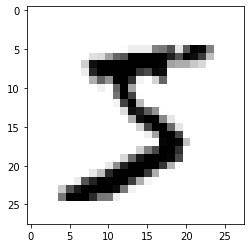

Classe de la première instance : 5
Type de la première instance : <class 'str'>


In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.imshow(image, cmap=mpl.cm.binary)
plt.show()
print("Classe de la première instance :", Y[0])
print("Type de la première instance :", type(Y[0]))


In [8]:
Y = Y.astype(np.uint8)


## 2- Répartition des données

In [9]:
# Répartition des données en base d'apprentissage et de test
X_train, X_test, y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]


# II- Apprentissage d'un classifieur multi-classes

# 1- Apprentissage des données

In [10]:
from sklearn.linear_model import SGDClassifier

# Question 14
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [11]:
# Question 15 : prédiction de la classe de la première instance de la base de données

# Prédiction de la classe de la première instance
first_instance = X_test.iloc[[0]] # Accès à la première instance par positionnement entier
predicted_class = sgd_clf.predict(first_instance)

print("La classe prédite pour la première instance de la base de données est :", predicted_class[0])



La classe prédite pour la première instance de la base de données est : 7


In [12]:
# a.
decision_scores = sgd_clf.decision_function(X_test[:10])
print("Scores de décision :", decision_scores)
max_positions = np.argmax(decision_scores, axis=1)
print("Positions des scores maximums :", max_positions)

# b.
classes = sgd_clf.classes_
print("Classes :", classes)


Scores de décision : [[-2.79727757e+04 -5.24177704e+04 -1.43449822e+04 -1.30844576e+03
  -1.99228453e+04 -9.20891066e+03 -3.83311365e+04  8.00754256e+03
  -4.27331795e+03 -5.95132911e+03]
 [-3.31945749e+04 -2.73895636e+04  3.58441151e+03 -1.06613505e+04
  -4.18674237e+04 -1.37845161e+03 -7.58605306e+03 -6.18950811e+04
  -9.24987571e+03 -4.06601832e+04]
 [-2.98291350e+04  5.47454056e+03 -4.16574257e+03 -1.70103458e+03
  -5.43506005e+03 -3.77679325e+03 -5.41539094e+03 -8.05265620e+03
  -1.11434116e+03 -4.51152643e+03]
 [ 1.03112879e+04 -4.07906103e+04 -9.34212930e+03 -5.90089690e+03
  -1.89596526e+04 -1.13464437e+04 -1.28247347e+04 -8.92777976e+03
  -4.40282393e+03 -1.04615899e+04]
 [-9.53341417e+03 -2.75277349e+04 -4.18221184e+03 -1.06247914e+04
   2.41638531e+03 -1.06829527e+04 -9.87735105e+03 -8.42224775e+03
  -5.94576672e+02 -4.33357206e+03]
 [-3.31701684e+04  7.38031536e+03 -6.10851693e+03 -9.05333593e+02
  -8.28580837e+03 -5.62304329e+03 -1.58525544e+04 -1.43228971e+03
  -9.3572247

## 2- Evaluation du modèle d'apprentissage sur les données d'apprentissage

### 2-1- Taux de classification

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# 19.
scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [14]:
print("Taux de classification par fold :", scores)
print("Moyenne des taux de classification :", scores.mean())

Taux de classification par fold : [0.87365 0.85835 0.8689 ]
Moyenne des taux de classification : 0.8669666666666668


In [ ]:
# 20.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
scores_scaled = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


In [ ]:
print("Taux de classification par fold après standardisation :", scores_scaled)
print("Moyenne des taux de classification après standardisation :", scores_scaled.mean())


Taux de classification par fold après standardisation : [0.8983 0.891  0.9018]
Moyenne des taux de classification après standardisation : 0.8970333333333333
